### Example 2 inferring where the normal with known variance is centered

We are repeatedly and independently measure $X_1, \ldots, X_n$ which we assume to be normally distributed with common unknown mean and known variance. For the sake of concreteness, suppose that the variance is 9.

We want to know the value of $\mu$ such that $X_1, \ldots, X_n\sim N(\mu,9)$.

That is, we imagine we already know that the variance is 9, but we want to know where the center of the bell shape is.

We formulate the hypothesis that the center is at 4:

- The null hypothesis $H_0$: $\hspace{5mm}$ $\mu=4$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $\mu \neq 4$. 

We choose a comparatively large value $c>0$, and we adopt the following test:

- Test: reject $H_0$ if $T_n \geq c$.

where $T_n =\left|\overline{X}_n - 4\right|$ and $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ is the average

If $c$ is large and the null hypothesis is true, then the event $T_n\geq c$ has small probability and so in employing our test

> we insure that, in the long run of experience, we shall not be too often wrong ({cite}`Neyman1933-zd` p. 291)

In other words:

> if we behave according to such a rule [the test], then in the long run we shall reject $H_0$ when it is true not more, say than once in a hundred times   ({cite}`Neyman1933-zd` p. 291; notation $H$ changed to $H_0$ to match preceding.)

In our example, we can again quantify how rare the event $T_n\geq c$ is, assuming the null hypothesis is true. It is the union of the events $\overline{X}_n\geq 4+c$ and $\overline{X}_n\leq 4-c$. And it turns out that $\overline{X}_n$ is also normal with $\overline{X}_n\sim N(4,\frac{9}{n})$.

Below is a simple visual representation, where the key thing is that in diagram to right as we make c bigger and bigger the probability gets smaller and smaller. The red line marks 5% (and so 5 out of a hundred rather than 1 out of a hundred), and so the value of c at which the blue line crosses the red line is the value of c such that the probability of the event $T_n\geq c$ falls under 5%, assuming the null hypothesis is true.   

In [53]:
import numpy as np                # load numpy package
import matplotlib.pyplot as plt   # load pyplot package
from scipy.stats import norm     # load binomial distribution
from shapely.geometry import LineString

In [54]:
# number of independent observations

n2 = 49

# parameters of the normal distribution

mu = 5

var = 1**2 #variance


In [55]:
# variance of the average

varavg = var / n2  # variance of the average

# standard deviation of the average

sigma = np.sqrt(var)
sigmaavg = np.sqrt(varavg)


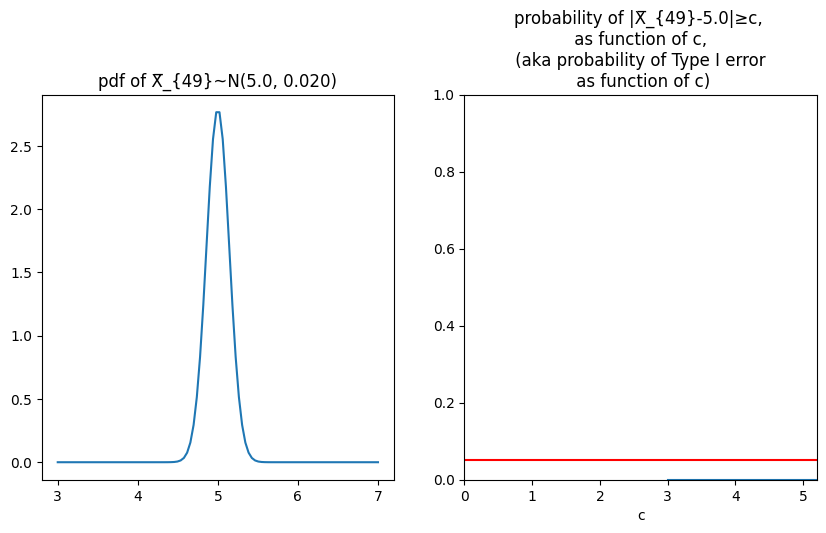

In [56]:
from scipy.stats import norm     # load normal distribution

# Create a range
x = np.linspace(mu-2*sigma, mu+2*sigma, 100)

# Create the normal distribution for the range
y = norm.pdf(x, mu, sigma)
yavg = norm.pdf(x, mu, sigmaavg)
tavg = 1-norm.cdf(mu+x, mu, sigmaavg)+norm.cdf(mu-x, mu, sigmaavg)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the normal distribution on the left subplot
axs[0].plot(x, yavg)
axs[1].plot(x, tavg)
axs[1].set_xlim(0, mu+2*sigma / 10)
axs[1].set_ylim(0, 1)    

# Plot the histogram on the right subplot
# axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

# Set titles
axs[0].set_title('pdf of X̅_{%i}~N(%1.1f, %1.3f)' % (n2, mu, varavg))
axs[1].set_title('probability of |X̅_{%i}-%1.1f|≥c, \n as function of c, \n (aka probability of Type I error \n as function of c)' % (n2, mu))
axs[1].set_xlabel('c')  # Add x-axis label
axs[1].axhline(y=.05, color='r', label='.05')

plt.show()

In [108]:
def normalvisual(mu, var, n):

    varavg = var / n  # variance of the average

    # standard deviation of the average

    sigma = np.sqrt(var)
    sigmaavg = np.sqrt(varavg)

    # Create a range
    x = np.linspace(-3, 20, 10000)
    l = arr = np.full(len(x), .05)

    # Create the normal distribution for the range
    y = norm.pdf(x, mu, sigma)
    yavg = norm.pdf(x, mu, sigmaavg)
    tavg = 1-norm.cdf(mu+x, mu, sigmaavg)+norm.cdf(mu-x, mu, sigmaavg)

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the normal distribution on the left subplot
    axs[0].plot(x, yavg)
    axs[1].plot(x, tavg)
    axs[0].set_xlim(-3, 20)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)    
    axs[1].plot(x, l, label='.05', color='r')


    # Plot the histogram on the right subplot
    # axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

    # Set titles
    axs[0].set_title('pdf of X̅_{%i}~N(%1.1f, %1.3f)' % (n, mu, varavg))
    axs[1].set_title('probability of |X̅_{%i}-%1.1f|≥c, \n as function of c, \n (aka probability of Type I error \n as function of c)' % (n2, mu))
    axs[1].set_xlabel('c')  # Add x-axis label

    first_line = LineString(np.column_stack((x, tavg)))
    second_line = LineString(np.column_stack((x, l)))
    intersection = first_line.intersection(second_line)

    # ... existing code ...

    intersection = first_line.intersection(second_line)

    axs[1].axvline(x=intersection.x, color='g', label='%1.2f' % intersection.x)
    axs[1].legend()
    

    plt.show()

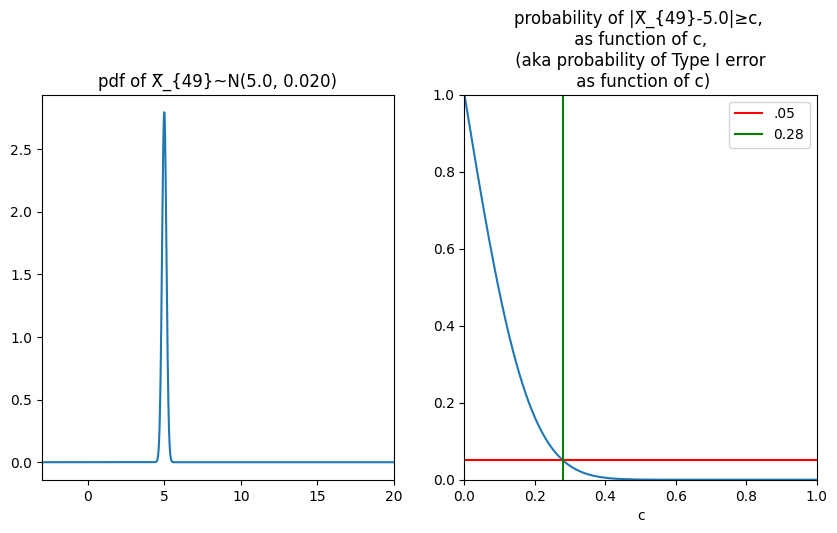

In [109]:
normalvisual(5, 1, 49)  

In [110]:
interactive(normalvisual, mu=(0, 20, .1), var=(0, 10, 1), n=(1, 100, 1))

interactive(children=(FloatSlider(value=10.0, description='mu', max=20.0), IntSlider(value=5, description='var…